In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Rreading train dataset
file_path = "../data/before40after60Origin.csv"
raw_data = pd.read_csv(file_path)
print("Data points count: ", raw_data['id'].count())
raw_data.head()


Data points count:  7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [36]:
data_1 = raw_data[raw_data["target"]==1]
data_1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [37]:
data1 = data_1.sample(n=3253)
data1

,id,keyword,location,text,target
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7316,10471,wild%20fires,NaN,Full Episode: WN 08/02/15: California Wild Fi...,1
7294,10436,wild%20fires,Houston,As wild fires blacken northern California parc...,1
3490,4988,explosion,"City of London, London",EE recalls Power Bar battery packs after explo...,1
2449,3517,derailment,NaN,Madhya Pradesh Train Derailment: Village Youth...,1
...,...,...,...,...,...
5901,8429,sandstorm,NaN,Watch This Airport Get Swallowed Up By A Sands...,1
7278,10418,whirlwind,"London, Sydney",Two hours to get to a client meeting. Whirlwin...,1
1575,2275,cliff%20fall,NaN,Fall off a cliff please https://t.co/4vWSL2Gfp0,1
6978,10009,twister,"Calgary, Alberta",Gail and Russell saw lots of hail at their Dal...,1


In [38]:
data_2 = raw_data[raw_data["target"]==0]
data_2

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [39]:
data2 = data_2.sample(n=2169)
data2

,id,keyword,location,text,target
6211,8862,smoke,NaN,Smoke ave streets hottest youngins,0
6671,9562,thunder,"Atlanta, GA",Am I hearing thunder or trucks?,0
7201,10316,weapon,NaN,only weapon im scared off is karma,0
914,1321,bloody,under the blanket,Wait until i tell my college friend who reafs ...,0
6026,8612,seismic,Smash Manor/Kanto,@marek1330 *Zar cringes at the blows but doesn...,0
...,...,...,...,...,...
968,1401,body%20bag,NaN,Check out Vintage Longaberger Floral Fabric Sh...,0
715,1035,bleeding,AZ,Joe Landolina: This gel can make you stop blee...,0
6092,8699,sinking,Memphis,Nigga car sinking but he snapping it up for fo...,0
2823,4058,displaced,"Ojodu,Lagos",Angry Woman Openly Accuses NEMA Of Stealing Re...,0


In [40]:
# 드리프트 전 데이터
# 초기 실험 데이터 재난:20% 평시: 80%
# 1080개 4342개
train1 = pd.concat([data1, data2])
train1 = train1.sample(len(train1))
train1

,id,keyword,location,text,target
6244,8920,snowstorm,Deployed in the Middle East,@CacheAdvance besides your nasty thunderstorm ...,0
6529,9339,survive,NaN,#Autoinsurance industry clueless on #driverles...,0
2513,3609,desolation,NBO,I rated The Hobbit: The Desolation of Smaug (2...,0
6253,8935,snowstorm,In the spirit world,Photo: mothernaturenetwork: What is thundersno...,1
1189,1712,bridge%20collapse,NaN,Two cranes restoring a bridge in the central D...,1
...,...,...,...,...,...
4153,5902,harm,i love you zayn,If anything happens I will fucking fly 2 MetLi...,0
6762,9688,tornado,NaN,Brunette beauty Night A stretches out on a vic...,0
5926,8459,screamed,Nirvana,@CortezEra I dead ass screamed when we signed ...,0
6897,9886,traumatised,London,I'm so sad Kids Company has closed. After all ...,0


Text(0.5, 0.98, 'Target Value Counts')

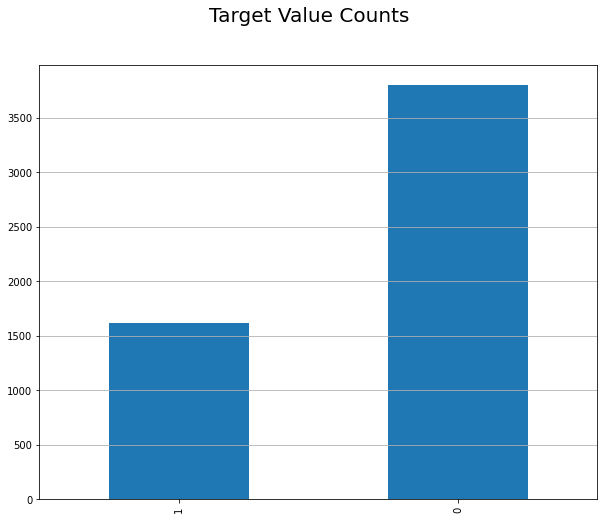

In [41]:
# Plotting target value counts
plt.figure(figsize=(10,8))
ax = train1['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
# plt.show()

In [42]:
train1.to_csv('../data/preprocess_data.csv', index=False)